#### 특정 레벨에서의 게이트 위치 변경(레벨 30 vs. 레벨 40)이유저의 플레이 행동 및 유지율(retention)에 미치는 영향 분석

- userid : 유저 아이디
- version : A/B 테스트를 위한 조건 (gate_30 : 게이트 위치가 30 레벨에 있는 집단 , gate_40 : 게이트 위치가 40 레벨에 있는 집단)
- sum_gamerounds : 14일 동안 플레이한 게임 라운드 수 
- retention_1 : 게임을 설치한 유저가 1일 후 (다음날)에도 게임을 했는지 여부
- retention_7 : 게임을 설치한 유저가 7일 후에도 게임을 접속했는지 여부 

In [1]:
import pandas as pd 
import numpy as np 

df = pd.read_csv('cookie_cats.csv')
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [2]:
df_cp = df.copy()
df_cp['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

In [3]:
df_cp['sum_gamerounds'].sort_values(ascending=False)

57702    49854
7912      2961
29417     2640
43671     2438
48188     2294
         ...  
59687        0
23707        0
59670        0
59645        0
45094        0
Name: sum_gamerounds, Length: 90189, dtype: int64

<AxesSubplot:>

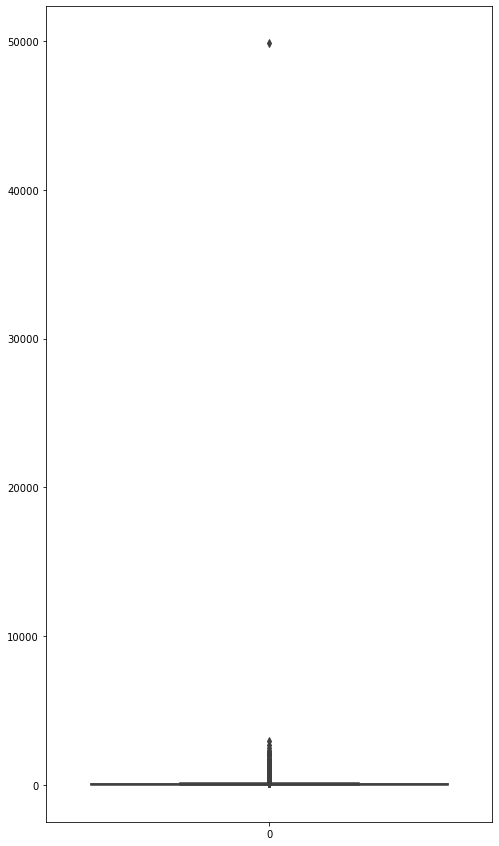

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt 

plt.figure(figsize=(8,15))
sns.boxplot(data = df_cp['sum_gamerounds'])

In [5]:
df_cp['version'].unique()

array(['gate_30', 'gate_40'], dtype=object)

In [6]:
df_cp['version'].isnull().sum()

0

In [7]:
df_cp['sum_gamerounds'].describe()

count    90189.000000
mean        51.872457
std        195.050858
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max      49854.000000
Name: sum_gamerounds, dtype: float64

In [8]:
len(df_cp[(df_cp['retention_1']==0)&(df_cp['retention_7']==0)])

46437

In [9]:
len(df[(df_cp['version']=='gate_30')&(df_cp['sum_gamerounds']<30)])

28044

In [10]:
len(df[(df_cp['version']=='gate_40')&(df_cp['sum_gamerounds']<40)])

31662

In [11]:
# 이상치 제거 
# sum_gamerounds 값이 0인 값은 이상치 -> 0 이상인 값만 추출 
# version 값이 30 인데 sumgamerouns 값이 30 미만인 값은 이상치 -> 제거 
# version 값이 40 인데 sumgamerouns 값이 40 미만인 값은 이상치 -> 제거 
# iqr 이용하여 이상치 제거 

df_cp = df_cp[df_cp['sum_gamerounds'] != 0]
# print(df_cp['sum_gamerounds'].describe())
# 이상치라 판단되는 max 값 제거 
df_cp = df_cp[df_cp['sum_gamerounds']<49854]

cond1 = ((df_cp['version']=='gate_30')&(df_cp['sum_gamerounds']>=30))
cond2 = ((df_cp['version']=='gate_40')&(df_cp['sum_gamerounds']>=40))

df_cp = df_cp[cond1|cond2]

# IQR 이용해서 이상치 제거 필요할때 사용  

# q1 = df_cp['sum_gamerounds'].quantile(0.25)
# q3 = df_cp['sum_gamerounds'].quantile(0.75)
# iqr = abs(q1-q3)
# upper = iqr+1.5*iqr
# lower = iqr-1.5*iqr

# print(upper)
# print(lower)
# df_cp = df_cp[(upper>df_cp['sum_gamerounds'])&(lower<df_cp['sum_gamerounds'])]

print(df_cp.info())
df_cp.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30482 entries, 1 to 90187
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          30482 non-null  int64 
 1   version         30482 non-null  object
 2   sum_gamerounds  30482 non-null  int64 
 3   retention_1     30482 non-null  bool  
 4   retention_7     30482 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 1012.1+ KB
None


,userid,version,sum_gamerounds,retention_1,retention_7
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
8,1574,gate_40,108,True,True


Text(0.5, 1.0, 'Gate at Level 40')

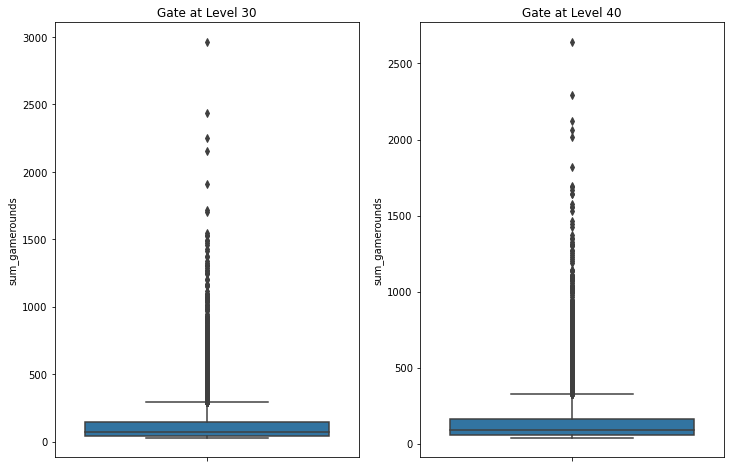

In [12]:
df_30 = df_cp[df_cp['version'] == 'gate_30']
df_40 = df_cp[df_cp['version'] == 'gate_40']

fig, axes = plt.subplots(1, 2, figsize=(12, 8))

sns.boxplot(y=df_30['sum_gamerounds'],ax=axes[0])
sns.boxplot(y=df_40['sum_gamerounds'],ax=axes[1])

axes[0].set_title("Gate at Level 30")
axes[1].set_title("Gate at Level 40")

카이제곱검정을 통해 version(gate_30, gate_40)과 retention_1의 독립성 유무 판단.    
** 카이제곱 검정 : 두개의 범주형 변수 독립성 유무 판단 

H0 : (귀무가설): version과 retention_1은 독립이다.    
H1 : (대립가설): version과 retention_1은 독립이 아니다.(=종속)

유의수준 0.05



In [13]:
df_cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30482 entries, 1 to 90187
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          30482 non-null  int64 
 1   version         30482 non-null  object
 2   sum_gamerounds  30482 non-null  int64 
 3   retention_1     30482 non-null  bool  
 4   retention_7     30482 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 1012.1+ KB


In [14]:
len(df_cp[(df_cp['retention_1']==0)&(df_cp['retention_7']==0)])

3535

In [15]:
from scipy.stats import chisquare, chi2_contingency

contingency_table = pd.crosstab(df_cp['version'], df_cp['retention_1'])

statistic, pvalue, dof, expected = chi2_contingency(contingency_table)

print('카이제곱 통계량 : ',statistic)
print('p value 값 : ' , pvalue)
print('자유도 : ', dof)
print('기대 빈도표 : ',np.round(expected,2))

if pvalue>0.05 :
    print('귀무가설 채택  version과 retention_1은 독립이다')
else:
    print('귀무가설 기각  version과 retention_1은 종속이다')

카이제곱 통계량 :  42.3002439205212
p value 값 :  7.828279587432345e-11
자유도 :  1
기대 빈도표 :  [[ 3093.65 13561.35]
 [ 2568.35 11258.65]]
귀무가설 기각  version과 retention_1은 종속이다


카이제곱검정을 통해 version(gate_30, gate_40)과 retention_7의 독립성 유무 판단.    
** 카이제곱 검정 : 두개의 범주형 변수 독립성 유무 판단 

H0 : (귀무가설): version과 retention_7은 독립이다.    
H1 : (대립가설): version과 retention_7은 독립이 아니다.(=종속)

유의수준 0.05


In [ ]:
from scipy.stats import chisquare, chi2_contingency

contingency_table2 = pd.crosstab(df_cp['version'],df_cp['retention_7'])

static, pvalue, dof, expected = chi2_contingency(contingency_table2)

print('카이제곱 통계량 : ',statistic)
print('p value 값 : ' , pvalue)
print('자유도 : ', dof)
print('기대 빈도표 : ',np.round(expected,2))


if pvalue>0.05 :
    print('귀무가설 채택  version과 retention_7은 독립이다')
else:
    print('귀무가설 기각  version과 retention_7은 종속이다')


df_n_cp = df_cp[['version','retention_1','retention_7']]
# df_n_cp
df_n_cp.pivot_table(index='version',columns='retention_1',aggfunc='count')


카이제곱 통계량 :  42.3002439205212
p value 값 :  7.026835904955452e-16
자유도 :  1
기대 빈도표 :  [[8997.92 7657.08]
 [7470.08 6356.92]]
귀무가설 기각  version과 retention_7은 종속이다


retention_7       
retention_1       False   True
version                       
gate_30            3314  13341
gate_40            2348  11479

In [33]:
df_n_cp.pivot_table(index='version',columns='retention_7',aggfunc='count')

retention_1      
retention_7       False  True
version                      
gate_30            9348  7307
gate_40            7120  6707

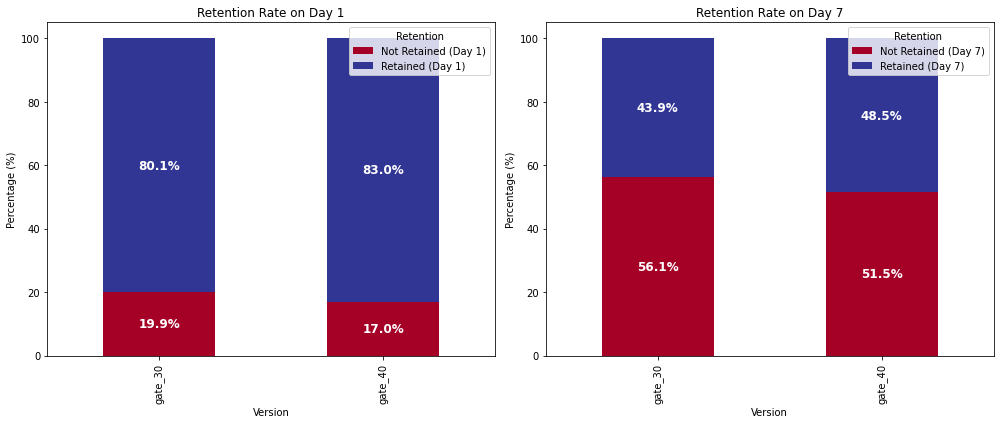

In [ ]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. version별 retention_1 비율 계산
ret1_table = pd.crosstab(df_cp['version'], df_cp['retention_1'], normalize="index") * 100
ret1_table = ret1_table.rename(columns={0: "Not Retained (Day 1)", 1: "Retained (Day 1)"})

# 2. version별 retention_7 비율 계산
ret7_table = pd.crosstab(df_cp['version'], df_cp['retention_7'], normalize="index") * 100
ret7_table = ret7_table.rename(columns={0: "Not Retained (Day 7)", 1: "Retained (Day 7)"})

# 3. 시각화를 위해 데이터 정리
ret1_table["Version"] = ret1_table.index
ret7_table["Version"] = ret7_table.index

# 4. 누적 막대 그래프 그리기
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 🔹 함수: 막대에 퍼센트 값 표시
def add_labels(ax, df):
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f%%", label_type="center", fontsize=12, color="white", weight="bold")

# Day 1 Retention (누적 막대 그래프)
ax1 = ret1_table.set_index("Version").plot(kind="bar", stacked=True, ax=axes[0], colormap="RdYlBu")
axes[0].set_title("Retention Rate on Day 1")
axes[0].set_ylabel("Percentage (%)")
axes[0].set_xlabel("Version")
axes[0].legend(title="Retention")
add_labels(axes[0], ret1_table)

# Day 7 Retention (누적 막대 그래프)
ax2 = ret7_table.set_index("Version").plot(kind="bar", stacked=True, ax=axes[1], colormap="RdYlBu")
axes[1].set_title("Retention Rate on Day 7")
axes[1].set_ylabel("Percentage (%)")
axes[1].set_xlabel("Version")
axes[1].legend(title="Retention")
add_labels(axes[1], ret7_table)

plt.tight_layout()
plt.show()

In [18]:
len(df_cp[(df_cp['retention_1']==1)&(df_cp['retention_7']==1)])

11887

In [19]:
len(df_cp[(df_cp['retention_1']==0)&(df_cp['retention_7']==0)])

3535

In [21]:
len(df_cp[(df_cp['retention_1']==0)&(df_cp['retention_7']==1)])

2127

38.99678498786169 42.428318351814184 6.977888589987534 11.597008070336592


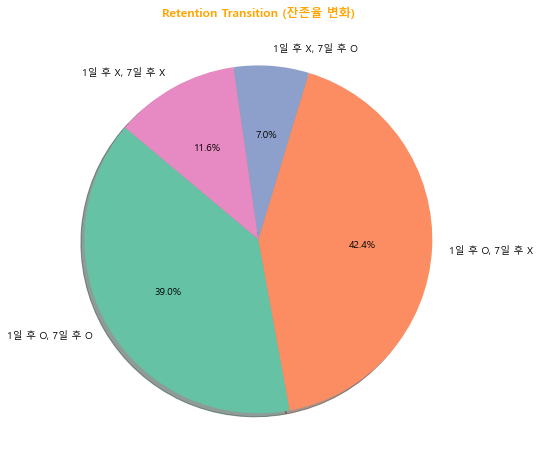

In [ ]:
## retention 그룹별 비율 
tot = len(df_cp)


rt_1T_7T = (len(df_cp[(df_cp['retention_1']==1)&(df_cp['retention_7']==1)])/tot)*100
rt_1T_7F = (len(df_cp[(df_cp['retention_1']==1)&(df_cp['retention_7']==0)])/tot)*100
rt_1F_7T = (len(df_cp[(df_cp['retention_1']==0)&(df_cp['retention_7']==1)])/tot)*100
rt_1F_7F = (len(df_cp[(df_cp['retention_1']==0)&(df_cp['retention_7']==0)])/tot)*100

print(rt_1T_7T,rt_1T_7F,rt_1F_7T,rt_1F_7F)
# 1. 데이터 준비
labels = ["1일 후 O, 7일 후 O",  "1일 후 O, 7일 후 X", "1일 후 X, 7일 후 O","1일 후 X, 7일 후 X"]
sizes = [rt_1T_7T, rt_1T_7F, rt_1F_7T, rt_1F_7F]  # 퍼센트 값
colors = ["#66c2a5", "#fc8d62", "#8da0cb", "#e78ac3"]  # 색상 지정
# explode = (0.1, 0, 0, 0)  # 첫 번째 조각 강조

# 2. 파이 차트 그리기
plt.rc('font', family='Malgun gothic')
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%.1f%%", colors=colors, startangle=140, shadow=True)
plt.title("Retention Transition (잔존율 변화)",fontweight="bold", color="orange")
plt.show()

